/tmp/ipython-input-2603215525.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='viridis')


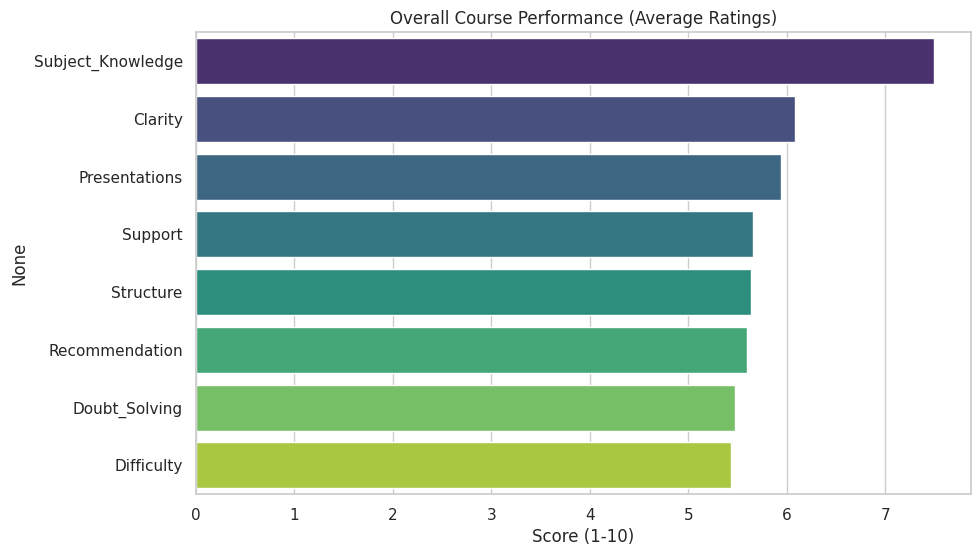

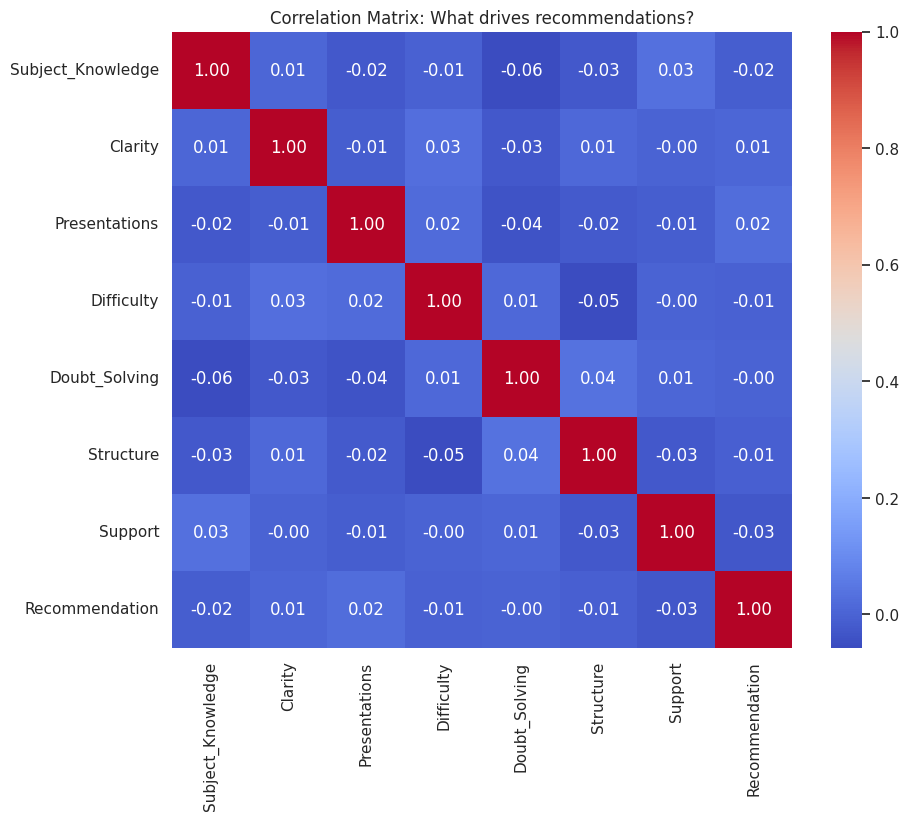

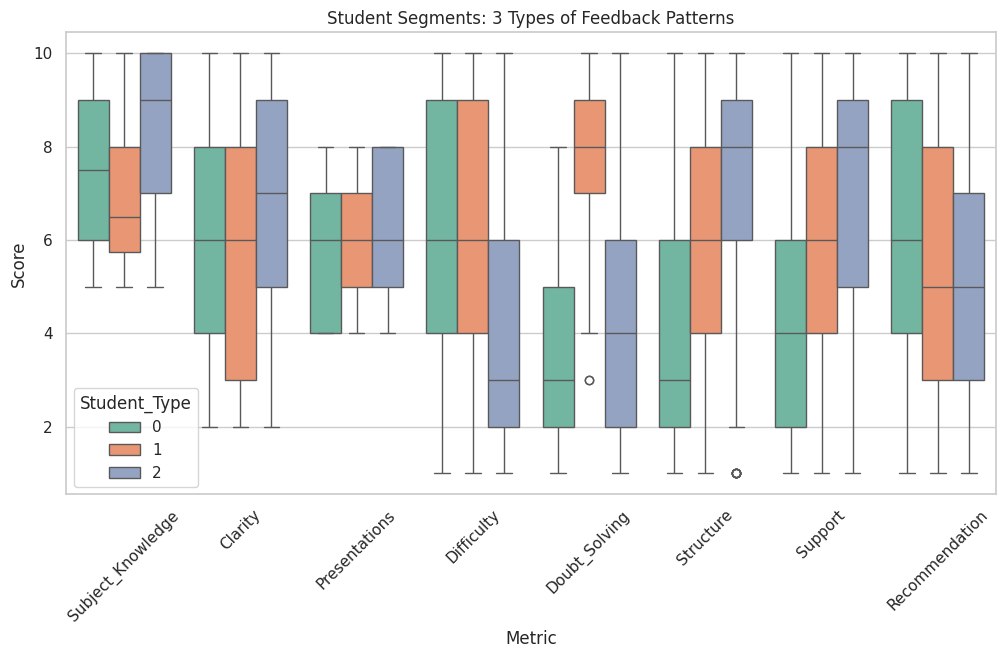

Average Ratings per Student Type:
              Subject_Knowledge   Clarity  Presentations  Difficulty  \
Student_Type                                                           
0                      7.450000  6.056250       5.781250    6.059375   
1                      6.855263  5.602632       5.781579    6.018421   
2                      8.358804  6.714286       6.315615    4.019934   

              Doubt_Solving  Structure   Support  Recommendation  
Student_Type                                                      
0                  3.378125   3.915625  4.043750        6.175000  
1                  8.131579   5.797368  5.910526        5.410526  
2                  4.348837   7.262458  7.069767        5.222591  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set visualization style
sns.set(style="whitegrid")

# --- STEP 1: LOAD THE CLEANED DATA ---
df = pd.read_csv('cleaned_student_feedback.csv')

# --- STEP 2: IDENTIFY STRENGTHS & WEAKNESSES ---
# Calculate the average rating for each category
avg_ratings = df.mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='viridis')
plt.title('Overall Course Performance (Average Ratings)')
plt.xlabel('Score (1-10)')
plt.show()

# --- STEP 3: CORRELATION HEATMAP ---
# See which variables move together
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: What drives recommendations?')
plt.show()

# --- STEP 4: STUDENT SEGMENTATION (Clustering) ---
# Group students into 3 "Personas" based on their ratings
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Create 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Student_Type'] = kmeans.fit_predict(scaled_df)

# Visualize the segments
plt.figure(figsize=(12, 6))
# Reshape data for plotting
df_melted = df.melt(id_vars='Student_Type', var_name='Metric', value_name='Score')
sns.boxplot(x='Metric', y='Score', hue='Student_Type', data=df_melted, palette='Set2')
plt.title('Student Segments: 3 Types of Feedback Patterns')
plt.xticks(rotation=45)
plt.show()

# Print the profile of each group
print("Average Ratings per Student Type:")
print(df.groupby('Student_Type').mean())